In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D


In [3]:
# Loading dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
data = pd.read_csv(file_path)
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Tokenization
    tokens = text.lower().split()

    # Stopwords removal
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

data['Processed_Message'] = data['Message'].apply(preprocess_text)
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                   Processed_Message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [5]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['Processed_Message']).toarray()
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)


In [6]:
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[964   2]
 [ 21 128]]


Confusion Matrix:
 [[964   2]
 [ 21 128]]


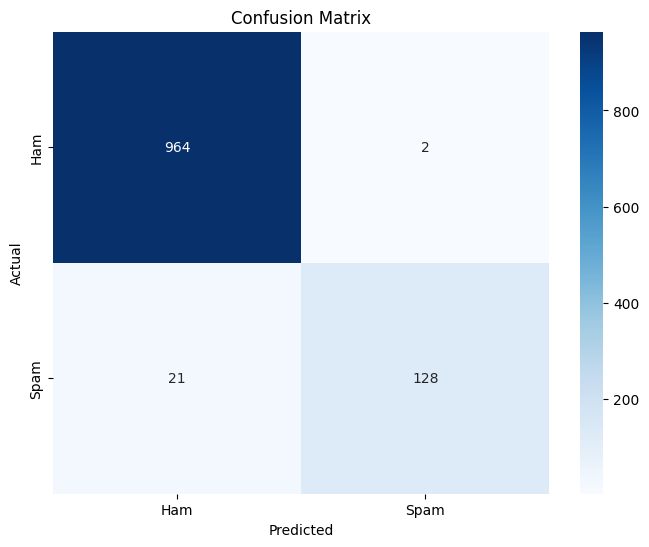

In [8]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64
Naive Bayes Model Accuracy with Unigrams and Bigrams: 0.9811659192825112
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   1]
 [ 20 129]]


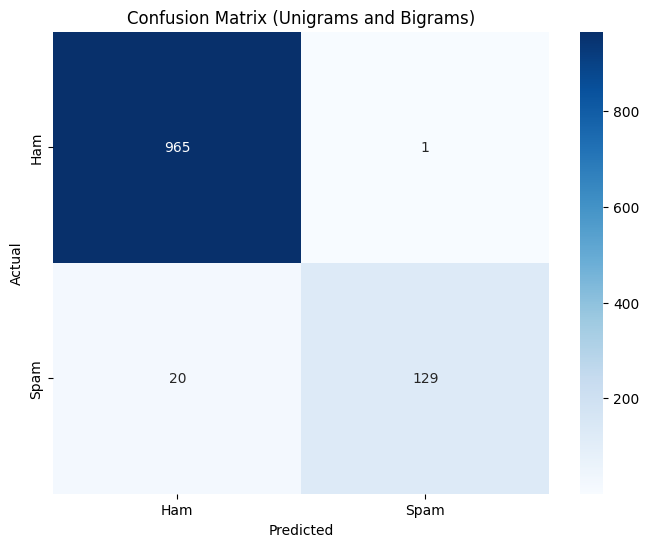

In [9]:
# Feature extraction using TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)
X = vectorizer.fit_transform(data['Processed_Message']).toarray()
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)
print(X)
print(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy with Unigrams and Bigrams:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Unigrams and Bigrams)')
plt.show()


In [10]:
# Prepare tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Processed_Message'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['Processed_Message'])

# Pad sequences
max_sequence_length = 100
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to numpy array
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
70/70 [==============================] - 25s 295ms/step - loss: 0.2563 - accuracy: 0.9145 - val_loss: 0.0862 - val_accuracy: 0.9758
Epoch 2/5
70/70 [==============================] - 22s 322ms/step - loss: 0.0508 - accuracy: 0.9850 - val_loss: 0.0474 - val_accuracy: 0.9865
Epoch 3/5
70/70 [==============================] - 24s 350ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 4/5
70/70 [==============================] - 22s 312ms/step - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.0422 - val_accuracy: 0.9892
Epoch 5/5
70/70 [==============================] - 22s 322ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0396 - val_accuracy: 0.9901


35/35 [==============================] - 1s 34ms/step
LSTM Model Accuracy: 0.9901345291479821
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

LSTM Confusion Matrix:
 [[963   3]
 [  8 141]]


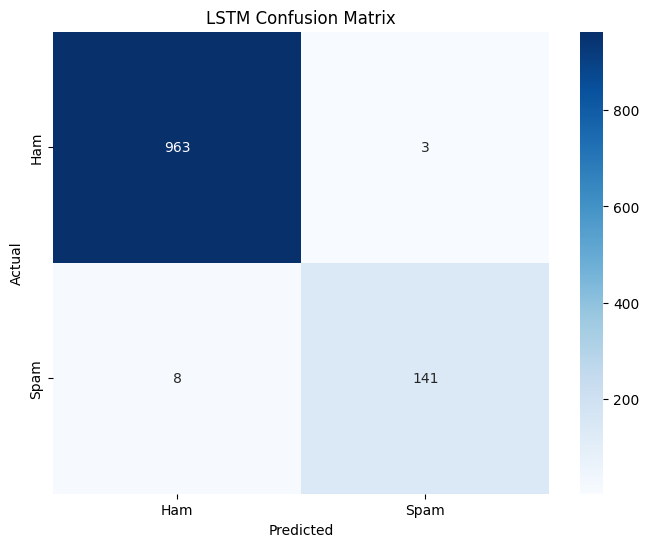

In [11]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("LSTM Model Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("LSTM Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("LSTM Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()


In [12]:
# Function to predict if a new message is spam or not
def predict_spam(message):
    # Preprocess the message
    processed_message = preprocess_text(message)

    # Create a new tokenizer with the same configuration
    new_tokenizer = Tokenizer(num_words=5000)
    new_tokenizer.fit_on_texts(data['Processed_Message'])

    # Convert the new message to a sequence
    new_sequence = new_tokenizer.texts_to_sequences([processed_message])

    # Pad the new sequence
    new_sequence = pad_sequences(new_sequence, maxlen=max_sequence_length)

    # Predict using the trained model
    prediction = model.predict(new_sequence)

    # Return the prediction result, ham will be given as true
    return 'Spam' if prediction[0][0] > 0.5 else 'true'
# Test the function with a new message
new_message = input("Enter message: ")
result = predict_spam(new_message)
print(f"The message '{new_message}' is classified as {result}.")

Enter message: hello all, how are you guys!
1/1 [==============================] - 0s 31ms/step
The message 'hello all, how are you guys!' is classified as true.
